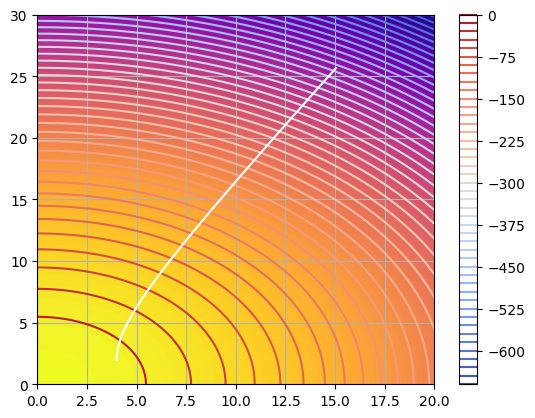

In [21]:
import matplotlib.pyplot as plt
import sympy as sp
from scipy.integrate import odeint
import numpy as np

x, y = sp.symbols('x y')

Ex=(1*x)

Ey=(1*y)

#Potential calculation:
def V(x,y):

    f = sp.Function('f')(y)

    V=-sp.integrate(Ex,x)
    V1=V+f

    dVdy=-sp.diff(V1,y)

    f_eq=sp.Eq(dVdy,Ey)

    f1=sp.solve(f_eq,sp.Derivative(f, y))[0]

    f_func = sp.integrate(f1, y)

    V2=V+f_func



    return V2

V3=V(x,y)

V31=sp.lambdify((x,y),V3,"numpy")

Ex1=sp.lambdify((x,y),Ex,"numpy")
Ey1=sp.lambdify((x,y),Ey,"numpy")




#Plotting:
x=np.linspace(0,20,1000)
y=np.linspace(0,30,1000)


X,Y=np.meshgrid(x,y)



#Particle Dynamics:

t=np.linspace(0,2,100)

q=1 #charge of particle 
m=1 #mass of particle

def dynamics(state,t):
    x,y,vx,vy=state

    ax=(q/m)*Ex1(x,y)
    ay=(q/m)*Ey1(x,y)

    return [vx,vy,ax,ay]

state0=[4,2,0,5]

sol=odeint(dynamics,state0,t)

x1,y1,vx1,vy1=sol.T

#Potential curve:
plt.grid(True)
plt.contourf(x,y,V31(X,Y),levels=200,cmap="plasma")
plt.contour(x,y,V31(X,Y),levels=60,cmap="coolwarm")

#Particle curve:
plt.plot(x1,y1,color="white")
plt.colorbar()



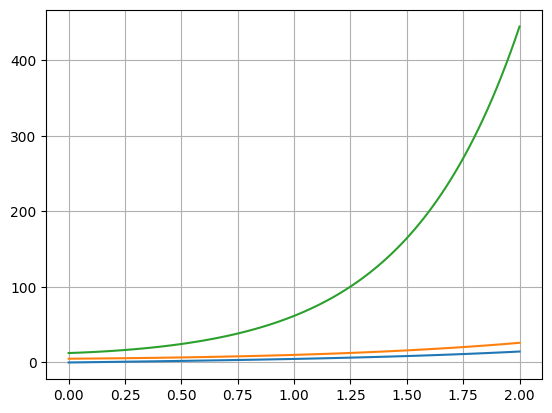

In [22]:
KE=0.5*m*((sol.T[2])**2+(sol.T[3])**2)

plt.plot(t,sol.T[2])
plt.plot(t,sol.T[3])
plt.plot(t,KE)

plt.grid(True)